<center>
    <H1>STAT3007 Deep Learning, Assignment 1</H1>
    <b>2024 Semester 1, due 5pm on 25 Mar</b>
</center>

Please read `instructions.ipynb` first.

**Name**: Henrik Olaussen
<br>
**Student Number**: 48183950

$\newcommand{\reals}{{\mathbf R}}$
$\newcommand{\bfx}{{\mathbf x}}$
$\newcommand{\bfw}{{\mathbf w}}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\E}{{\mathbb E}}$

## Q1. Regularization (25 marks)

**(a)** (5 marks)
We consider a logistic regression model for a $K$-class classification problem

\begin{align*}
p(y | \bfx, \beta) 
= 
\exp\left(\bfx^{\top}\beta_{y,1:d} + \beta_{y,0}\right)/\sum_{y'} \exp\left(\bfx^{\top}\beta_{y',1:d} + \beta_{y',0}\right)
\end{align*}
where $\beta_{y,1:d} = (\beta_{y,1}, \ldots, \beta_{y,d})$ are the feature coefficients and $\beta_{y,0}$ is the bias for class $y$, and 
$\beta$ denotes all the parameters.

We train the model by minimizing the regularized logloss on a training set $(\bfx_{1}, y_{1}), \ldots, (\bfx_{n}, y_{n})$:
\begin{align*}
    \beta_{\lambda} = \arg\min_{\beta}
    \Bigl(-\sum_{i=1}^n \ln p(y_{i} \mid \bfx_{i}, \beta)
    +
    \lambda \sum_{y=1}^{K} \sum_{j=1}^{d} \beta_{yj}^2\Bigr).
\end{align*}

Complete the code in the partial answer below to generate a plot of the log-likelihood 
$L(\lambda) = \sum_{i=1}^n \ln p(y_{i} \mid \bfx_{i}, \beta_{\lambda})$ for $\lambda \in [0.001, 10]$.
If you are using `sklearn`'s logistic regression model to answer the question, you should read the [API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and 
[User Guide](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) (particularly Section 1.1.11.2)
and carefully set the relevant hyperparameters. 

In addition, describe how the log-likelihood of the trained model changes as the regularization strength $\lambda$ increases, and provide a brief explanation for your observation.

**Answer.** 

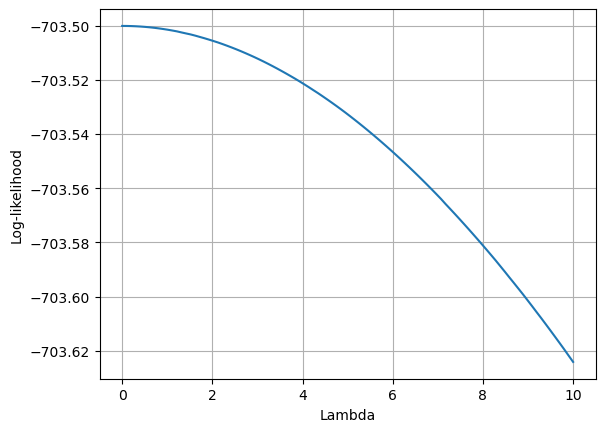

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# generate a random dataset
n_samples, n_features, n_classes = 1000, 20, 3
rng = np.random.RandomState(0)
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes,
                           n_informative=8, random_state=rng)

# Task: write your code to generate the plot of L(𝜆) for 𝜆∈[0.001,10]

n = 100
lmda = np.linspace(0.001,10,n)

ll_array = np.zeros(n)
for i in range(n):
    lr = LogisticRegression(penalty = 'l2', C = 1/lmda[i])
    lr.fit(X,y)
    p = lr.predict_proba(X) #each row consists of probabilities for each of the three classes 
    for j in range(n_samples):
        ll_array[i] += np.log(p[j,y[j]])

plt.plot(lmda, ll_array)
plt.xlabel('Lambda')
plt.ylabel('Log-likelihood')
plt.grid()
plt.show()
    

The value of the log-likelihood decrease as the value of $\lambda$ increase. In addition, if we penalise the model more, the $\beta$-values will shrink. The likelihood function tells us how likely it is to observe what we have observed as a function of $\lambda$. A large value of the likelihood function might indicate that the model is too closely fitted to the training data, which results in overfitting. In contrast, a small value of the likelihood function will lead to underfitting as the $\beta$ values are too small (and the $\lambda$ values are too large) to catch the relationship between the covariates and the response. 

**(b)** (10 marks) Consider the following regularized empirical risk minimization problem for learning a neural network $f(\bfx; \bfw, b)$ with weights $\bfw$ and biases $b$:
\begin{align}
	\min_{\bfw, b}
	\Bigl(\sum_{i=1}^n L(y_{i}, f(\bfx_{i}; \bfw, b)) 
     +
	\lambda ||\bfw||_2^2\Bigr),
\end{align}
where $\lambda > 0$.
Prove that there exists an $r \ge 0$,
such that any minimizer of the following constrained problem is a minimizer of the regularized problem:
\begin{align}
	&\qquad \min_{\bfw, b} 
	\sum_{i=1}^n L(y_{i}, f(\bfx_{i}; \bfw, b)) \\
	\text{s.t.} &\qquad ||\bfw||_{2} \le r. 
\end{align}

**Answer.** 

Firstly, we know that every norm has the property of positivity, meaning that for every norm we have $||\cdot|| \geq 0$. Consequently, we must have that $r \geq 0$. Moreover, if we fix $r = ||\bfw||_2$, we have that the minimisation of the regularised problem becomes:

$$
\underset{\bfw, b}{\text{min}}\sum_{i=1}^n L(y_{i}, f(\bfx_{i}; \bfw, b)) + \lambda ||\bfw||_2^2 = \underset{\bfw, b}{\text{min}}\sum_{i=1}^n L(y_{i}, f(\bfx_{i}; \bfw, b)) + \lambda r^2
$$

To find the minimizers of the right-hand side, we calculate the gradient and set it equal to zero:

$$
\nabla \sum_{i=1}^n L(y_{i}, f(\bfx_{i}; \bfw, b)) + \nabla \lambda r^2 = \nabla \sum_{i=1}^n L(y_{i}, f(\bfx_{i}; \bfw, b)) = 0 
$$

Now we see that this is the same as calculating the gradient of the non-regularised problem and set that equal to zero. Thus, these two objectives have the same minimisers. We have therefore proved that there exists a $r \geq 0$, (more specifically, $r = ||\bfw||_2$) such that any minimizer of the constrained problem is a minimizer of the regularized problem.

**(c)** (10 marks) A common trick to prevent a model from overfitting to the training data is to augment the training set with perturbed training examples.
This is a technique that is particularly commonly used for training large neural networks.
In this problem, you will show that for linear regression, perturbing examples with Gaussian noise plays is equivalent to performing $\ell_{2}$ regularization (when there are unlimited examples).

Specifically, let $(\bfx, y) \in \reals^{d} \times \reals$ denote a random example sampled from the underlying data distribution.
Let $\bfx' = \bfx + \epsilon$ be the perturbed example obtained by adding to $\bfx$ with a scaled $d$-dimensional standard Gaussian noise 
$\epsilon \sim N(0, \sigma^{2} I_{d})$, where $I_{d}$ is the $d \times d$ idenity matrix.
Prove the following equation:
\begin{align*}
    \E (\beta^{\top} \bfx' - y)^{2}
    &=
    \E (\beta^{\top} \bfx - y)^{2} + \sigma^{2} \|\beta\|_{2}^{2}.
\end{align*}

**Answer.**

$$
\E(\beta^T \bfx' -y)^2 = \E(\beta^T \bfx + \beta^T \epsilon - y)^2 = \E(\beta^T \bfx -y)^2 + 2 \E(\beta^T\bfx-y)\E\beta^T\epsilon + \E(\beta^T\epsilon)^2 \\
$$

Because $\E\epsilon = 0$, we have that $\sigma^2=\text{var}[\epsilon]=\E(\epsilon-\E\epsilon)^2 = \E(\epsilon^T\epsilon)$. In addition, this makes the term $2 \E(\beta^T\bfx-y)\E\beta^T\epsilon$ equal 0. 

$$
\E(\beta^T \bfx -y)^2 + 2 \E(\beta^T\bfx-y)\E\beta^T\epsilon + \E(\beta^T\epsilon)^2  = \E(\beta^T \bfx -y)^2 + \E(\beta^T\epsilon)^2 \\
\implies \E(\beta^T \bfx' -y)^2 = \E (\beta^{\top} \bfx - y)^{2} + \sigma^{2} \|\beta\|_{2}^{2}.
$$

Because $\beta^T\beta = \|\beta\|_{2}^{2}$.

## Q2. Statistical learning theory (10 marks)

In practice, we often see that the training set performance is better than the
test set performance.
In this question, we prove that indeed, on average, we obtain better training set
error than test set error.
Formally, let $(x_{1}, y_{1}), \ldots, (x_{n}, y_{n})$ be a random i.i.d. training
set, and 
$(x'_{1}, y'_{1}), \ldots, (x'_{m}, y'_{m})$ be a random i.i.d. test set, both drawn
from the same distribution $P(X, Y)$.
Let $\hat{f}$ be the empirical risk minimizer on the training set, and 
\begin{align} 
    R_{tr}(\hat{f}) &= \frac{1}{n} \sum_{i} L(x_{i}, y_{i}, \hat{f}), \\
    R_{ts}(\hat{f}) &= \frac{1}{m} \sum_{i} L(x'_{i}, y'_{i}, \hat{f}),
\end{align}
Prove that 
\begin{align}
    \mathbb{E} R_{tr}(\hat{f}) \le \mathbb{E} R_{ts}(\hat{f}),
\end{align}
where the expectation is taken wrt both the training set and the test set.


**Answer**.

We know that $\hat{f} = \text{argmin}_f \frac{1}{n} \sum_{i=1}^{n} L(x_i,y_i,f)$. Furthermore, I don't know how to prove this.

## Q3. Animals Are All You Need (65 marks)

We will use some simple labeled animal images to study a number of ideas that we have covered in this course.

The data consists of a training set and four different test sets stored in the file `animals.pkl`. The images in the training set are clean animal images, while those in the test sets are transformed animal images. The code below shows how you can load the data. A few example images are shown.

**Answer**.

image size = (80, 80) ; max value = 1.0 ; min value = 0.0
training examples


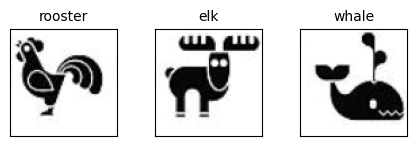

test set rot - randomly rotated images


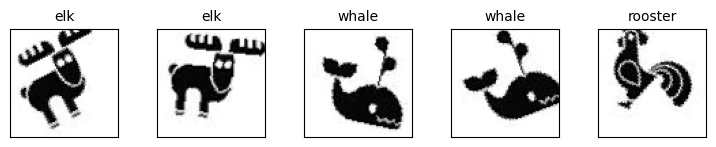

test set cut - one quadrant cut off


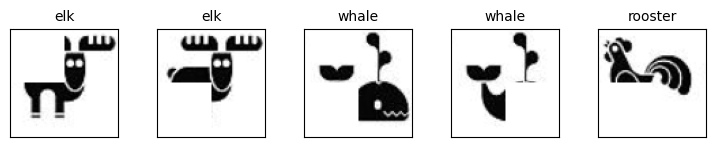

test set p4 - each pixel value v flipped to 1-v with probability 0.4


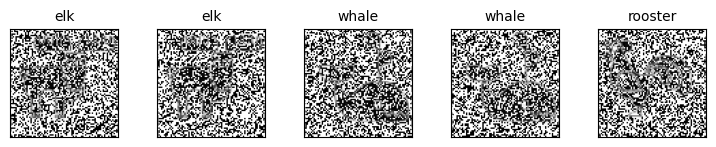

test set p6 - each pixel value v flipped to 1-v with probability 0.6


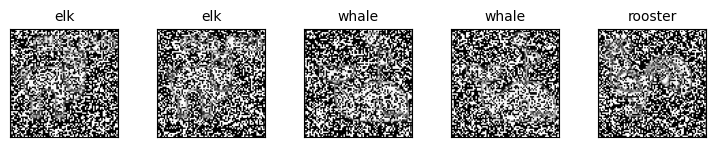

In [2]:
from util import *
import pickle as pkl

animals = pkl.load(open('animals.pkl', 'rb'))

image = animals['x_tr'][0]
print('image size =', image.shape, '; max value =', image.max(), '; min value =', image.min())

print('training examples')
x_tr, y_tr = animals['x_tr'], animals['y_tr']
plot_gallery(animals['x_tr'], titles=animals['y_tr'])

print('test set rot - randomly rotated images')
x_ts_rot, y_ts_rot = animals['x_ts_rot'], animals['y_ts_rot']
plot_gallery(animals['x_ts_rot'][:5], titles=animals['y_ts_rot'][:5])

print('test set cut - one quadrant cut off')
x_ts_cut, y_ts_cut = animals['x_ts_cut'], animals['y_ts_cut']
plot_gallery(x_ts_cut[:5], titles=y_ts_cut[:5])

print('test set p4 - each pixel value v flipped to 1-v with probability 0.4')
x_ts_p4, y_ts_p4 = animals['x_ts_p4'], animals['y_ts_p4']
plot_gallery(x_ts_p4[:5], titles=y_ts_p4[:5])

print('test set p6 - each pixel value v flipped to 1-v with probability 0.6')
x_ts_p6, y_ts_p6 = animals['x_ts_p6'], animals['y_ts_p6']
plot_gallery(x_ts_p6[:5], titles=y_ts_p6[:5])

### I. Logistic regression and Naive Bayes (10 marks)

**(a)** (8 marks) Train a logistic regression model using the three training examples, and report the model's classification accuracy on the training set and the four test sets. Briefly describe the model's performance. In addition, reshape the `coef_` variable of the model as as 3x80x80 array and plot it as 3 images, then provide a brief explanation for the model's performance.

**Answer.** 

In [3]:
#fit the model
lr_animal = LogisticRegression()
lr_animal.fit(x_tr.reshape(len(x_tr),-1),y_tr) #need to reshape the image matrices in order to use the sklearn implementation

#Test on test set rot
print('Accuracy on test set rot: ', lr_animal.score(x_ts_rot.reshape(len(x_ts_rot),-1), y_ts_rot))

Accuracy on test set rot:  1.0


In [4]:
#Test on training set
print('Accuracy on training set: ', lr_animal.score(x_tr.reshape(len(x_tr),-1), y_tr))

Accuracy on training set:  1.0


In [5]:
#Test on test set rot
print('Accuracy on test set rot: ', lr_animal.score(x_ts_rot.reshape(len(x_ts_rot),-1), y_ts_rot))

Accuracy on test set rot:  1.0


In [6]:
#Test on test set cut
print('Accuracy on test set cut: ', lr_animal.score(x_ts_cut.reshape(len(x_ts_cut),-1), y_ts_cut))

Accuracy on test set cut:  1.0


In [7]:
#Test on test set p4
print('Accuracy on test set p4: ', lr_animal.score(x_ts_p4.reshape(len(x_ts_p4),-1), y_ts_p4))

p4_pr = lr_animal.predict(x_ts_p4.reshape(len(x_ts_p4),-1))

Accuracy on test set p4:  1.0


In [8]:
#Test on test set p6
print('Accuracy on test set p6: ', lr_animal.score(x_ts_p6.reshape(len(x_ts_p6),-1), y_ts_p6))

Accuracy on test set p6:  0.0


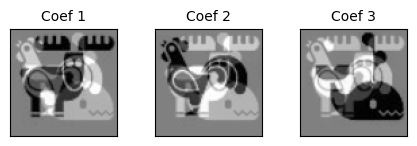

In [9]:
#Plot of the coefficients 
coef_rs = lr_animal.coef_.reshape(3,80,80)

plot_gallery(coef_rs, titles = ('Coef 1', 'Coef 2', 'Coef 3'))

For the first three test sets, the logistic regression model classifies all images correctly. However, the same model classifies all images wrong when testing on the p6 test set. In this test set, the images are relatively noisy compared to the other test sets, making it hard for the model to find patterns in the data that coincide with the training data. One other thing to noice is that for the p6 model, the shapes of the animals are of a lighter shade than the background. This might cause problems when performing the classification, as the animals from the training examples are black on a white background (the opposite of what we are seeing in p6). Thus, the model performs very bad on this set. In contrast, the data in the three other test sets are still closely related to the training data, making the classification rather easy. 

In addition, the training examples might have very distinct features that are easy to 'recognise' in the first three test sets. Consequently, the model performs perfectly on these test sets.  

**(b)** (2 marks) Train a Naive Bayes model using the three training examples, and report the model's classification accuracy on the training set and the four test sets. Compare the Naive Bayes classifier's performance with that of logistic regression.

**Answer.**

In [10]:
from sklearn.naive_bayes import GaussianNB

#train NB
nb = GaussianNB()
nb.fit(x_tr.reshape(len(x_tr),-1),y_tr)

GaussianNB()

In [11]:
#Test on training set
print('Accuracy on training set: ', nb.score(x_tr.reshape(len(x_tr),-1), y_tr))

Accuracy on training set:  1.0


In [12]:
#Test on test set rot
print('Accuracy on test set rot: ', nb.score(x_ts_rot.reshape(len(x_ts_rot),-1), y_ts_rot))

Accuracy on test set rot:  1.0


In [13]:
#Test on test set cut
print('Accuracy on test set cut: ', nb.score(x_ts_cut.reshape(len(x_ts_cut),-1), y_ts_cut))

Accuracy on test set cut:  1.0


In [14]:
#Test on test set p4
print('Accuracy on test set p4: ', nb.score(x_ts_p4.reshape(len(x_ts_p4),-1), y_ts_p4))

Accuracy on test set p4:  1.0


In [15]:
#Test on test set p6
print('Accuracy on test set p6: ', nb.score(x_ts_p6.reshape(len(x_ts_p6),-1), y_ts_p6))

Accuracy on test set p6:  0.0


The performance of the Naive Bayes model is identical to the Logistic regression done earlier. The reason might still be that the training data and the first three test sets are closely related, whereas the last test set is too noisy to find any similarities with the training set. 

### II. PCA (25 marks)

**(c)** (5 marks) Perform PCA on the training set with 2 principal components only. Use the `explained_variance_ratio_` variable in `sklearn.decomposition.PCA` to compute the proportion of variance accounted by the 2 principal components.

**Answer.**

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_tr.reshape(len(x_tr),-1), y_tr)

print('Propotion of variance explained by PC1 and PC2, respectively: ', pca.explained_variance_ratio_)

Propotion of variance explained by PC1 and PC2, respectively:  [0.59763695 0.40236305]


**(d)** (5 marks) Use `plot_gallery` to plot the two principal components by reshaping them as images of the same shape as the training images. Describe the principal component images in relation to the training images.

**Answer.**

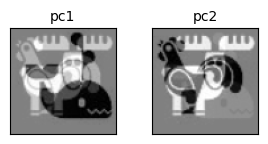

In [17]:
pc1 = pca.components_[0].reshape((80,80))
pc2 = pca.components_[1].reshape((80,80))

plot_gallery((pc1,pc2), titles = ('pc1','pc2'))

We can see that the principal component images has the shapes of all the animals. Thus, it looks like the two principal components has captured most of the variance in the training data. In other words, the features of the training data are still present in the principal component representation of the training data. 

**(e)** (5 marks) Use the above PCA model to compute 2D projections of the training set and the `rot` test set. Construct a scatter plot of these projections. You may find the [API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for `matplotlib.pyplot.scatter` helpful. Use different colors for different animals, and visually distinct markers for the training examples (e.g., use `marker='o'` for the training examples and `marker='+'` for the test examples). Describe how rotation affects the 2D projections of the animal images.

**Answer.**

In [18]:
train_tf = pca.transform(x_tr.reshape(len(x_tr), -1))
rot_tf = pca.transform(x_ts_rot.reshape(len(x_ts_rot),-1))

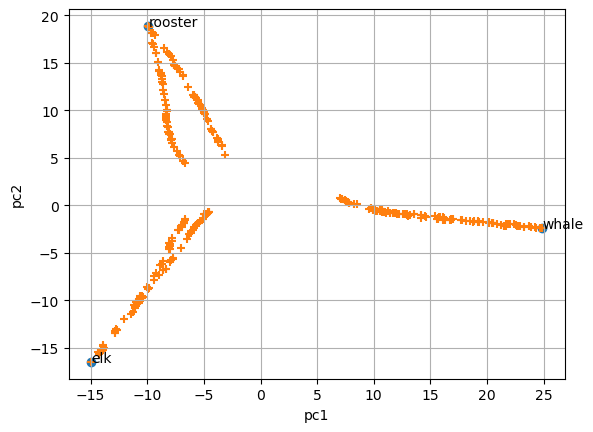

In [19]:
#plot for training projections 
plt.scatter(train_tf[:,0], train_tf[:,1], marker='o')
for (i,txt) in enumerate(y_tr):
    plt.annotate(txt, (train_tf[i,0], train_tf[i,1])) 

plt.scatter(rot_tf[:,0], rot_tf[:,1], marker = '+')
plt.grid()
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

By examining the plot, we can see that certain rotations projects the images closer to (0,0). However, the projections are well separated between the three classes. This suggests that even when using the principal component representation, we are likely to achieve perfect classification on the rotation test set. Therefore, it is likely that the classification task will be more challenging for images with a greater roation compared to those in  this test set. 

**(f)** (5 marks) Train a logistic regression classifier using the 2D projections as features, and report the model's classification accuracy on the training set and the four test sets. How does this classifier compare with the logistic regression classifier trained on the original dataset?

**Answer.**

In [20]:
#fit logistic regression using the principal components
lr_pca = LogisticRegression()
lr_pca.fit(train_tf, y_tr)

LogisticRegression()

In [21]:
#classification accuracy on training set
lr_pca.score(train_tf, y_tr)

1.0

In [22]:
#classification accuracy on test set rot
lr_pca.score(rot_tf, y_ts_rot)

1.0

In [23]:
#classification accuracy on test set cut
lr_pca.score(pca.transform(x_ts_cut.reshape(len(x_ts_cut),-1)), y_ts_cut)

1.0

In [24]:
#classification accuracy on test set p4
lr_pca.score(pca.transform(x_ts_p4.reshape(len(x_ts_p4),-1)), y_ts_p4)

1.0

In [25]:
#classification accuracy on test set p6
lr_pca.score(pca.transform(x_ts_p6.reshape(len(x_ts_p6),-1)), y_ts_p6)

0.0

Compared to the logistic regression done on the original data, the principal component model performs identically. As suggested in the discussion of the rotated test set projections, the classification with principal components performs perfectly on the rotation test set. Moreover, the model still misclassify every test image from the last test set. 

**(g)** (5 marks) Use the above PCA model to first project the first 5 images in the `p4` test set, then reconstruct the images from the projections. Plot both the original images and the reconstructed images. Describe what PCA does based on these images.

**Answer.**

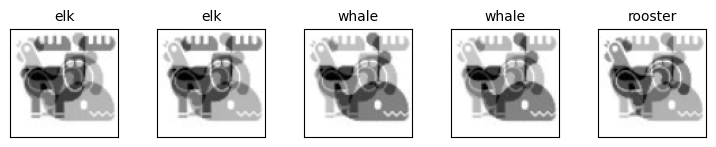

In [26]:
p4_pca = pca.transform(x_ts_p4[:5].reshape(5,-1)) #pca<
p4_recon = pca.inverse_transform(p4_pca) #reconstructed

#plotting of the reconstructed images
plot_gallery(p4_recon.reshape(5,80,80), titles = y_ts_p4[:5])

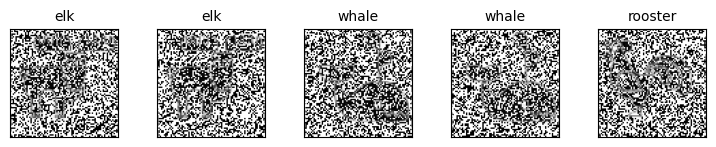

In [27]:
#plotting of the original images
plot_gallery(x_ts_p4[:5], titles = y_ts_p4[:5])

It looks like the principal component reconstruction removes all the noise from the original test data. We are left with images containing all three animals, but with different strength. The reconstructed images above may suggest that the animals with the strongest shade are the most probable classification of the original noisy images.  

### III. MLP (5 marks)

**(h)** (5 marks) Use [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to train two MLP classifiers using the three training examples.
The first one should use `random_state=11` and the second one should use `random_state=131`. 
In addition, use the following hyperparameters for both classifiers:
* The MLP has a single hidden layer with 10 hidden neurons using the sigmoid (or logistic) activation.
* Use a constant learning rate of 0.001.
* Use at most 1000 iterations.
All other hyperparameters should be their default values in sklearn.

Report both models' classification accuracies on the training set and the four test sets.
If the results are different for both classifiers, explain why.

**Answer.**

In [28]:
from sklearn.neural_network import MLPClassifier

mlp1 = MLPClassifier(random_state=11, hidden_layer_sizes=(10,), activation='logistic', learning_rate='constant', learning_rate_init=0.001, max_iter=1000)
mlp2 = MLPClassifier(random_state=131, hidden_layer_sizes=(10,), activation='logistic', learning_rate='constant', learning_rate_init=0.001, max_iter=1000)

mlp1.fit(x_tr.reshape(len(x_tr),-1), y_tr)
mlp2.fit(x_tr.reshape(len(x_tr),-1), y_tr)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000,
              random_state=131)

In [29]:
#classification accuracy on training set
pred_tr_1 = mlp1.predict(x_tr.reshape(len(x_tr),-1))
pred_tr_2 = mlp2.predict(x_tr.reshape(len(x_tr),-1))

print('Classification accuracy for the first MLP classifier: ', mlp1.score(x_tr.reshape(len(x_tr),-1), y_tr))
print('Classification accuracy for the second MLP classifier: ', mlp2.score(x_tr.reshape(len(x_tr),-1), y_tr))

Classification accuracy for the first MLP classifier:  1.0
Classification accuracy for the second MLP classifier:  1.0


In [30]:
#classification accuracy on test set rot
print('Classification accuracy for the first MLP classifier: ', mlp1.score(x_ts_rot.reshape(len(x_ts_rot),-1), y_ts_rot))
print('Classification accuracy for the second MLP classifier: ', mlp2.score(x_ts_rot.reshape(len(x_ts_rot),-1), y_ts_rot))

Classification accuracy for the first MLP classifier:  1.0
Classification accuracy for the second MLP classifier:  0.96


In [31]:
#classification accuracy on test set cut
print('Classification accuracy for the first MLP classifier: ', mlp1.score(x_ts_cut.reshape(len(x_ts_cut),-1), y_ts_cut))
print('Classification accuracy for the second MLP classifier: ', mlp2.score(x_ts_cut.reshape(len(x_ts_cut),-1), y_ts_cut))

Classification accuracy for the first MLP classifier:  1.0
Classification accuracy for the second MLP classifier:  1.0


In [32]:
#classification accuracy on test set p4
print('Classification accuracy for the first MLP classifier: ', mlp1.score(x_ts_p4.reshape(len(x_ts_p4),-1), y_ts_p4))
print('Classification accuracy for the second MLP classifier: ', mlp2.score(x_ts_p4.reshape(len(x_ts_p4),-1), y_ts_p4))

Classification accuracy for the first MLP classifier:  0.9966666666666667
Classification accuracy for the second MLP classifier:  0.8966666666666666


In [33]:
#classification accuracy on test set p6
print('Classification accuracy for the first MLP classifier: ', mlp1.score(x_ts_p6.reshape(len(x_ts_p6),-1), y_ts_p6))
print('Classification accuracy for the second MLP classifier: ', mlp2.score(x_ts_p6.reshape(len(x_ts_p6),-1), y_ts_p6))

Classification accuracy for the first MLP classifier:  0.0
Classification accuracy for the second MLP classifier:  0.01


We see that the test accuracies are different for all test sets except for test set cut. Firstly, all weights and biases are initialised randomly. Also, we have not chosen a specific solver for the optimisation of the loss function. Therefore, the default solver 'adam' is used, which refers to a stochastic gradient-based optimiser. A stochastic gradient-based method uses a randomly selected subset of the data when estimating the gradient. Consequently, the two networks will give slightly different predicitons on the test sets (because of the randomness that occurs during training). In general, the first network performs better than the second one. 

### IV. Hopfield networks (25 marks)

**(i)** (15 marks) Implement a Hopfield network by filling in the code below according to the comments. Note the following:
- The network is trained on binary images.
- The network should be able to classify binary images.
- The network should terminate the reconstruction process once the recontructed image does not change any more.

In this question, each binary image is a 2D array with entries being either 0 or 1.

**Answer.**

In [59]:
class HopfieldNet:
    """
    A Hopfield Network class.
    
    Example
    -------
    >>> net = HopfieldNet()
    >>> net.fit(images, labels) # see fit on requirements on images and labels
    >>> print("Training accuracy:", net.score(images, labels))
    """

    def __init__(self):
        pass

    def fit(self, images, labels=None):
        """
        Train a Hopfield network.
        
        Parameters
        ----------
        images: An array of 2D binary images. Each pixel value is either 0 or 1.
        labels: An optional 1D array of labels for the images. Required for classify and score.
        """
        self.images = np.array(images)
        self.labels = labels

        # Task: add your training code below
        self.row = len(self.images[0])
        self.col = len(self.images[1])

        self.m = self.row*self.col
        self.W = np.zeros((self.m,self.m))
        
        for im in self.images:
            self.W += np.outer((2*im-1).flatten(),(2*im-1).flatten())

        np.fill_diagonal(self.W, 0)


    def predict(self, images, sync=False, niter=100, verbose=False):
        """
        Compute and return the reconstrutions for the given images.
        
        Parameters
        ----------
        images: An array of 2D binary images. Each pixel value is either 0 or 1.
        sync: Use synchrounous update if True, and semi-random update if False.
        niter: Maximum number of iterations used for computing a reconstruction. 
            An iteration involves updating each neuron once. Stop the reconstruction
            process once the patterns do not change any more in an iteration.
        verbose: Print debug messages if set to True. Put any debug message under "if verbose:" block.
        
        Returns
        -------
        reconstructions: an array of reconstructed 2D binary image. Each pixel value is either 0 or 1.
        """
        reconstrutions = []

        # Task: modify the code below to compute the reconstructions for all input images
        images = images.reshape(len(images),-1)
        images = 2*images -1
        for image in images:
            converged = False
            recon = image
            for i in range(niter): # stop once the reconstruction doesn't change any more
                if sync: # synchronous update
                    recon_new = np.sign(np.dot(self.W, recon))
                    if np.array_equal(recon_new, recon):
                        converged = True
                        recon = (recon+1)/2 #make into 1s and 0s again
                        reconstrutions.append(recon.reshape((self.row,self.col)))
                        break
                else: # semi-random update -> does not work properly 
                    neuron_order = np.random.choice(self.m, self.m,replace=False)
                    recon_new = np.zeros(self.m)
                    for neuron in neuron_order:
                        recon_new[neuron] = np.sign(np.dot(recon_new, self.W[:,neuron]))
                    if np.array_equal(recon, recon_new):
                        converged = True
                        #recon_curr = (recon_curr + 1)/2 #transform back to 0 and 1s
                        reconstrutions.append(recon_new.reshape((self.row, self.col)))
                        break
                recon = recon_new 
            

            if verbose:
                if converged:
                    print('converged in %d iteration(s)' % (i+1))
                else:
                    print('update did not converge in %d iteration(s)' % (i+1))


        return np.array(reconstrutions)

    def classify(self, images, **kwargs):
        """
        Classify images. To classify an image, first compute its reconstruction, then predict
        its class to be the reconstruction's nearest training example's label.
        
        Parameters
        ----------
        images: An array of 2D binary images. Each pixel value is either 0 or 1.
        kwargs: These are keyword arguments that are accepted by the predict function.
        
        Returns
        -------
        labels: An array of predicted class labels.
        """
        assert self.labels is not None # labels need to be provided when using fit to train the model

        labels = []
        # Task: add your code to implement the classification method described in the docstring above.
        recons = self.predict(images, sync = True)
        for recon in recons:
            score = np.inf
            pred = None
            for (j,im) in enumerate(self.images):
                temp = np.linalg.norm(recon-im)
                if temp < score:
                    score = temp
                    pred = self.labels[j]

            labels.append(pred)
     
        return np.array(labels)

    def score(self, images, labels, **kwargs):
        """
        Returns the classification accuracy on the given dataset.
        """
        return np.mean(self.classify(images, **kwargs) == labels)

**(j)** (5 marks) Train a Hopfied network using the training examples. Note that the animal images are non-binary images. You can use the following `binarize` function to convert an array of non-binary images to binary ones.

In [35]:
# binarize an image by setting a pixel value to 1 if it's larger than the mean pixel value, and to 0 otherwise.
def binarize(images): 
    return np.array([(image > np.mean(image)) for image in images])

**Report the Hopfield network's classification accuracies on the training set and the four test sets, and describe how the four transformations affect Hopfield network's classification accuracy. You can set `sync` to either `True` or `False`.**

**Answer.**

In [60]:
#train network
net = HopfieldNet()
net.fit(binarize(x_tr), y_tr)

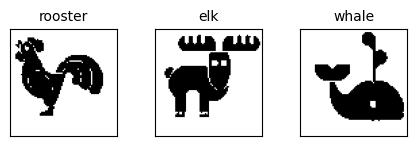

In [61]:
recon_train = net.predict(binarize(x_tr.reshape(3,-1)), sync=True)
lab_train = net.classify(recon_train)

plot_gallery(recon_train, lab_train) #reconstructed training examples

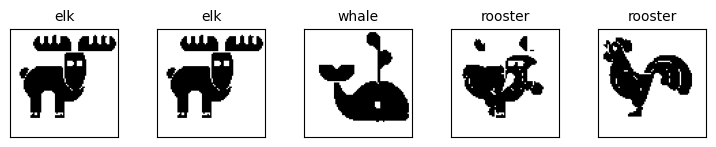

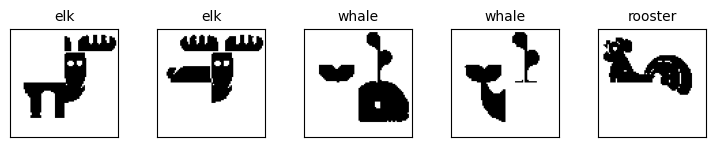

In [62]:
recon = net.predict(binarize(x_ts_cut[:5].reshape(5,-1)), sync = True)
lab = net.classify(recon)

plot_gallery(recon, lab) #plotting of first 5 reconstructed images from test set cut with predicitons 
plot_gallery(binarize(x_ts_cut[:5]), y_ts_cut[:5]) #original images

In [63]:
#Classification on training set
print('Classification accuracy: ', net.score(binarize(x_tr), y_tr, sync=True))

Classification accuracy:  1.0


In [64]:
#Classification on test set with rotation
print('Classification accuracy: ', net.score(binarize(x_ts_rot), y_ts_rot, sync=True))

Classification accuracy:  0.65


In [65]:
#Classification on test set cut
print('Classification accuracy: ', net.score(binarize(x_ts_cut), y_ts_cut, sync=True))

Classification accuracy:  0.88


In [56]:
#Classification on test set p4
print('Classification accuracy: ', net.score(binarize(x_ts_p4), y_ts_p4, sync=True))

Classification accuracy:  1.0


In [57]:
#Classification on test set p6
print('Classification accuracy: ', net.score(binarize(x_ts_p6), y_ts_p6, sync=True))

Classification accuracy:  0.0


**(k)** (5 marks) Use the above Hopfield network to perform reconstruction on the first five images from the `p6` test set. What's the relationship between the reconstructed images and the clean images used to form the noisy images in `p6`? Discuss this in relation to the Hopfield network's classification accuracy on `p6` as in (j).

**Answer.**

In the code chunk below I will plot the reconstructed images with the predicted labels as titles to each image.

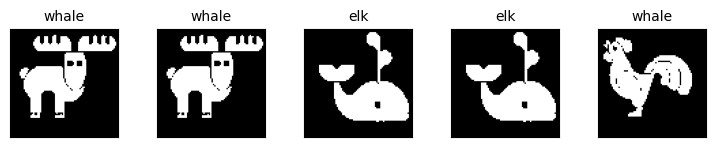

In [66]:
p6_recon = net.predict(binarize(x_ts_p6[:5]), sync= True) #reconstructed images
p6_pred_labels = net.classify(binarize(x_ts_p6[:5]), sync = True) #predicted labels
plot_gallery(p6_recon, titles = p6_pred_labels)

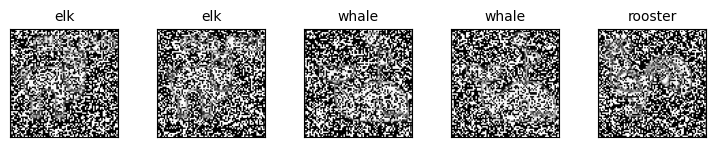

In [67]:
#original images from the test set with correct labels
plot_gallery(x_ts_p6[:5], titles = y_ts_p6[:5])

Even though the correct classification rate for this test set is 0, it looks like the reconstruced images capures the correct animals. However, the reconstructed images are the opposites of the original training images. When making a prediction, the network compares each pixel of the reconstructed images to those of the training images. In this case, the reconstructions are very different from the training examples. Consequently, the network misclassifies all test examples. A possible explaination for the diffrence is that the weak outline of the animals in the noisy images has a lighter color than the background. As a result, the network predicts that the outline of the animals are white rather than black. 

By swapping the white and black pixels, we can try to perform the classification using the p6 test set again:

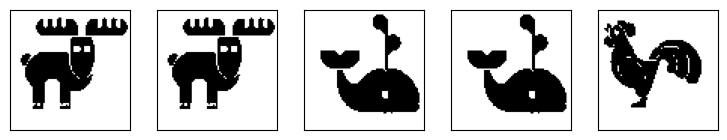

In [68]:
p6_recon_all = net.predict(binarize(x_ts_p6), sync = True)
p6_recon_all = (p6_recon_all - 1)*(-1) #transformation

#plot to see if it worked
plot_gallery(p6_recon_all[:5])

In [69]:
#similar to what is done in classify, but now with the transformed version of the reconstructed images from p6 test set. 
labels = []

for recon in p6_recon_all: #label the predictions 
    score = np.inf
    curr_pred = None
    for (i,im) in enumerate(x_tr): #iterate over training examples
        temp = np.linalg.norm(recon-im) #using 2nd norm to calculate distance between training images and reconstructed images
        if temp < score:
            score = temp
            curr_pred = y_tr[i] 
    labels.append(curr_pred)

accuracy = np.mean(labels == y_ts_p6)

print('Classification accuracy: ', accuracy)

Classification accuracy:  1.0


We see that the hopfield network actually reconstructs and classifies the test images from the p6 test set very well. 